In [1]:
import numpy as np
import scipy as sp

from qiskit.visualization import *

In [2]:
I = sp.sparse.csr_array(np.array([[1, 0], [0, 1]]))
X = sp.sparse.csr_array(np.array([[0, 1], [1, 0]]))
Y = sp.sparse.csr_array(np.array([[0, -1j], [1j, 0]]))
Z = sp.sparse.csr_array(np.array([[1, 0], [0, -1]]))

In [3]:
op_1 = sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, I))))))) # X_1 X_3
op_2 = sp.sparse.kron(Y, sp.sparse.kron(I, sp.sparse.kron(Y, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, I))))))) # Y_1 Y_3
op_3 = sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, I))))))) # X_2 X_4
op_4 = sp.sparse.kron(I, sp.sparse.kron(Y, sp.sparse.kron(I, sp.sparse.kron(Y, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, I))))))) # Y_2 Y_4
op_5 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(X, sp.sparse.kron(I, I))))))) # X_5 X_6
op_6 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Y, sp.sparse.kron(Y, sp.sparse.kron(I, I))))))) # Y_5 Y_6
op_7 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(X, X))))))) # X_7 X_8
op_8 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Y, Y))))))) # Y_7 Y_8
op_9 = sp.sparse.kron(X, sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(Z, sp.sparse.kron(I, I))))))) # X_1 X_2 Z_5 Z_6
op_10 = sp.sparse.kron(Y, sp.sparse.kron(Y, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(Z, sp.sparse.kron(I, I))))))) # Y_1 Y_2 Z_5 Z_6
op_11 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, Z))))))) # X_3 X_4 Z_7 Z_8
op_12 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Y, sp.sparse.kron(Y, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, Z))))))) # Y_3 Y_4 Z_7 Z_8
op_13 = sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(X, I))))))) # Z_1 Z_3 X_5 X_7
op_14 = sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(Y, sp.sparse.kron(I, sp.sparse.kron(Y, I))))))) # Z_1 Z_3 Y_5 Y_7
op_15 = sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(I, X))))))) # Z_2 Z_4 X_6 X_8
op_16 = sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(Y, sp.sparse.kron(I, Y))))))) # Z_2 Z_4 Y_6 Y_8

In [4]:
t = 1
delta_t = 2
n = 1

\begin{align}
\exp \left[-i \frac{-2t \Delta t}{n} \left( X_1 X_3 + Y_1 Y_3 + X_2 X_4 + Y_2 Y_4 + X_5 X_6 + Y_5 Y_6 + X_7 X_8 + Y_7 Y_8 + X_1 X_2 Z_5 Z_6 + Y_1 Y_2 Z_5 Z_6 + X_3 X_4 Z_7 Z_8 + Y_3 Y_4 Z_7 Z_8 + Z_1 Z_3 X_5 X_7 + Z_1 Z_3 Y_5 Y_7 + Z_2 Z_4 X_6 X_8 + Z_2 Z_4 Y_6 Y_8 \right) \right]
\end{align}

In [5]:
Eq_1 = sp.sparse.linalg.expm(-1j*-2*t*delta_t/n*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8 + op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16))

c:\Users\thilo\anaconda3\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
c:\Users\thilo\anaconda3\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:285: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


In [6]:
exp_op_1 = sp.sparse.linalg.expm(-1j*op_1)
exp_op_2 = sp.sparse.linalg.expm(-1j*op_2)
exp_op_3 = sp.sparse.linalg.expm(-1j*op_3)
exp_op_4 = sp.sparse.linalg.expm(-1j*op_4)
exp_op_5 = sp.sparse.linalg.expm(-1j*op_5)
exp_op_6 = sp.sparse.linalg.expm(-1j*op_6)
exp_op_7 = sp.sparse.linalg.expm(-1j*op_7)
exp_op_8 = sp.sparse.linalg.expm(-1j*op_8)
exp_op_9 = sp.sparse.linalg.expm(-1j*op_9)
exp_op_10 = sp.sparse.linalg.expm(-1j*op_10)
exp_op_11 = sp.sparse.linalg.expm(-1j*op_11)
exp_op_12 = sp.sparse.linalg.expm(-1j*op_12)
exp_op_13 = sp.sparse.linalg.expm(-1j*op_13)
exp_op_14 = sp.sparse.linalg.expm(-1j*op_14)
exp_op_15 = sp.sparse.linalg.expm(-1j*op_15)
exp_op_16 = sp.sparse.linalg.expm(-1j*op_16)

### Suzuki-Trotter approximation

\begin{align}
\approx& \exp \left[-i \frac{-2t \Delta t}{2n} \left( X_1 X_3 + Y_1 Y_3 + X_2 X_4 + Y_2 Y_4 + X_5 X_6 + Y_5 Y_6 + X_7 X_8 + Y_7 Y_8 \right) \right] \\
&\cdot \exp \left[-i \frac{-2t \Delta t}{2} \left( X_1 X_2 Z_5 Z_6 + Y_1 Y_2 Z_5 Z_6 + X_3 X_4 Z_7 Z_8 + Y_3 Y_4 Z_7 Z_8 + Z_1 Z_3 X_5 X_7 + Z_1 Z_3 Y_5 Y_7 + Z_2 Z_4 X_6 X_8 + Z_2 Z_4 Y_6 Y_8 \right) \right] \\
&\cdot \exp \left[-i \frac{-2t \Delta t}{2n} \left( X_1 X_3 + Y_1 Y_3 + X_2 X_4 + Y_2 Y_4 + X_5 X_6 + Y_5 Y_6 + X_7 X_8 + Y_7 Y_8 \right) \right]
\end{align}

In [7]:
n = 100
Eq_suzuki = sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8)/(2*n)) * sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16)/n) * sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8)/(2*n))
for _ in range(n-1):
    Eq_suzuki *= sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8)/(2*n)) * sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16)/n) * sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8)/(2*n))

In [8]:
print("Error: " + str(np.linalg.norm(Eq_1.toarray() - Eq_suzuki.toarray(), 2)))

Error: 0.02491828559151971


### Lie-Trotter approximation

\begin{align}
\approx& \exp \left[-i \frac{-2t \Delta t}{n} \left( X_1 X_3 + Y_1 Y_3 + X_2 X_4 + Y_2 Y_4 + X_5 X_6 + Y_5 Y_6 + X_7 X_8 + Y_7 Y_8 \right) \right] \\
&\cdot \exp \left[-i \frac{-2t \Delta t}{n} \left( X_1 X_2 Z_5 Z_6 + Y_1 Y_2 Z_5 Z_6 + X_3 X_4 Z_7 Z_8 + Y_3 Y_4 Z_7 Z_8 + Z_1 Z_3 X_5 X_7 + Z_1 Z_3 Y_5 Y_7 + Z_2 Z_4 X_6 X_8 + Z_2 Z_4 Y_6 Y_8 \right) \right] \\
\end{align}

In [9]:
n = 100
Eq_lie = sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8)/(n)) * sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16)/n)
for _ in range(n-1):
    Eq_lie *= sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8)/(n)) * sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16)/n)

In [10]:
print("Error: " + str(np.linalg.norm(Eq_1.toarray() - Eq_lie.toarray(), 2)))

Error: 0.2162865763548615


### Lie-Trotter convergence

In [11]:
t = 1
num_steps = [x*5 for x in range(1,10)]
error_list = []
for n in num_steps:
    trotter = sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8)/(n)) * sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16)/n)
    for _ in range(n-1):
        trotter *= sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8)/(n)) * sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16)/n)
    error = np.linalg.norm(Eq_1.toarray() - trotter.toarray(), 2)
    error_list.append(error)

[1.9983559436521716, 1.9344912934535647, 1.636950164748036, 1.1996081658800588, 0.9326259834590721, 0.7613813274280675, 0.6434254571171647, 0.5574252374303673, 0.4919509560691832]
[5, 10, 15, 20, 25, 30, 35, 40, 45]


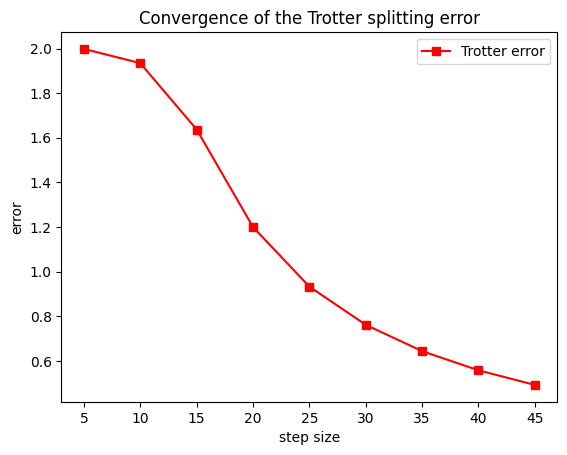

In [12]:
from matplotlib import pyplot as plt

plt.plot(num_steps, error_list, linestyle='-', marker='s', color='r', label='Trotter error')
plt.xlabel("step size")
plt.ylabel("error")
#plt.xscale("log", base=2)
#plt.yscale("log",base=10)
plt.title("Convergence of the Trotter splitting error")
plt.legend()
print(error_list)
print(num_steps)

\begin{align}
\approx \prod_{n} &\exp \left[-i \frac{-2t \Delta t}{2n} (X_1 X_3 + Y_1 Y_3 + X_2 X_4 + Y_2 Y_4 + X_5 X_6 + Y_5 Y_6 + X_7 X_8 + Y_7 Y_8) \right] \\ &\cdot \exp \left[-i \frac{-2t \Delta t}{n} (X_1 X_2 Z_5 Z_6 + Y_1 Y_2 Z_5 Z_6 + X_3 X_4 Z_7 Z_8 + Y_3 Y_4 Z_7 Z_8 + Z_1 Z_3 X_5 X_7 + Z_1 Z_3 Y_5 Y_7 + Z_2 Z_4 X_6 X_8 + Z_2 Z_4 Y_6 Y_8) \right] \\ &\cdot \exp \left[-i \frac{-2t \Delta t}{2n} (X_1 X_3 + Y_1 Y_3 + X_2 X_4 + Y_2 Y_4 + X_5 X_6 + Y_5 Y_6 + X_7 X_8 + Y_7 Y_8) \right]
\end{align}

### Trotter splitting is equal to gate decomposition

In [13]:
op_17 = sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(I, I))))))) # X_1 X_5
op_18 = sp.sparse.kron(Y, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Y, sp.sparse.kron(I, sp.sparse.kron(I, I))))))) # Y_1 Y_5
op_19 = sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(I, I))))))) # Z_1 Z_5
op_20 = sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, I))))))) # Z_1
op_21 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(I, I))))))) # Z_5

op_22 = sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(I, I))))))) # X_2 X_6
op_23 = sp.sparse.kron(I, sp.sparse.kron(Y, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Y, sp.sparse.kron(I, I))))))) # Y_2 Y_6
op_24 = sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, I))))))) # Z_2 Z_6
op_25 = sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, I))))))) # Z_2
op_26 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, I))))))) # Z_6

op_27 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(X, I))))))) # X_3 X_7
op_28 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Y, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Y, I))))))) # Y_3 Y_7
op_29 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, I))))))) # Z_3 Z_7
op_30 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, I))))))) # Z_3
op_31 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, I))))))) # Z_7

op_32 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, X))))))) # X_4 X_8
op_33 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Y, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, Y))))))) # Y_4 Y_8
op_34 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, Z))))))) # Z_4 Z_8
op_35 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, I))))))) # Z_4
op_36 = sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, sp.sparse.kron(I, Z))))))) # Z_8

In [14]:
t = 1
delta_t = 1
theta = 8*t*delta_t
n = 1

pSwap13 = sp.sparse.linalg.expm(+1j*theta/4*(op_1 + op_2)/(1*n))
pSwap24 = sp.sparse.linalg.expm(+1j*theta/4*(op_3 + op_4)/(1*n))
pSwap56 = sp.sparse.linalg.expm(+1j*theta/4*(op_5 + op_6)/(1*n))
pSwap78 = sp.sparse.linalg.expm(+1j*theta/4*(op_7 + op_8)/(1*n))

fSwap15 = sp.sparse.linalg.expm(-1j*np.pi/4*(op_17 + op_18)) * sp.sparse.linalg.expm(-1j*np.pi/2*(op_19)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_20)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_21))
fSwap26 = sp.sparse.linalg.expm(-1j*np.pi/4*(op_22 + op_23)) * sp.sparse.linalg.expm(-1j*np.pi/2*(op_24)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_25)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_26))
fSwap37 = sp.sparse.linalg.expm(-1j*np.pi/4*(op_27 + op_28)) * sp.sparse.linalg.expm(-1j*np.pi/2*(op_29)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_30)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_31))
fSwap48 = sp.sparse.linalg.expm(-1j*np.pi/4*(op_32 + op_33)) * sp.sparse.linalg.expm(-1j*np.pi/2*(op_34)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_35)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_36))

c:\Users\thilo\anaconda3\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
c:\Users\thilo\anaconda3\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:285: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


In [15]:
lel = sp.sparse.linalg.expm(-1j*-2*t*delta_t/n*(op_1 + op_2))
print("Error: " + str(np.linalg.norm(lel.toarray() - pSwap13.toarray(), 2)))

Error: 0.0


In [16]:
a = sp.sparse.linalg.expm(-1j*(-2*t*delta_t)*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8)/(n)) * sp.sparse.linalg.expm(-1j*(-2*t*delta_t)*(op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16)/n)
b = (pSwap13 * pSwap24 * pSwap56 * pSwap78) * (fSwap15 * fSwap26 * fSwap37 * fSwap48) * (pSwap13 * pSwap24 * pSwap56 * pSwap78) * (fSwap15 * fSwap26 * fSwap37 * fSwap48)
print("Error: " + str(np.linalg.norm(a.toarray() - b.toarray(), 2)))

Error: 2.259847507637017e-15


\begin{align}
&= \prod_n \exp \left[ -i \frac{-2t \Delta t}{n} \left( X_1 X_3 + Y_1 Y_3 + X_2 X_4 + Y_2 Y_4 + X_5 X_6 + Y_5 Y_6 + X_7 X_8 + Y_7 Y_8 \right) \right] \\ &\qquad \cdot \exp \left[ -i \frac{-2t \Delta t}{n} \left( X_1 X_2 Z_5 Z_6 + Y_1 Y_2 Z_5 Z_6 + X_3 X_4 Z_7 Z_8 + Y_3 Y_4 Z_7 Z_8 + Z_1 Z_3 X_5 X_7 + Z_1 Z_3 Y_5 Y_7 + Z_2 Z_4 X_6 X_8 + Z_2 Z_4 Y_6 Y_8 \right) \right]
\\
&= \prod_n \left( pSwap_{1,3} \cdot pSwap_{2,4} \cdot pSwap_{5,6} \cdot pSwap_{7,8} \right) \cdot \left( fSwap_{1,5} \cdot fSwap_{2,6} \cdot fSwap_{3,7} \cdot fSwap_{4,8} \right) \cdot \left( pSwap_{1,3} \cdot pSwap_{2,4} \cdot pSwap_{5,6} \cdot pSwap_{7,8} \right) \cdot \left( fSwap_{1,5} \cdot fSwap_{2,6} \cdot fSwap_{3,7} \cdot fSwap_{4,8} \right)
\end{align}

### Pauli string to change sign

\begin{align}
&= Z_2 Z_3 Z_5 Z_8 \cdot \exp \left[ -i \frac{-2t \Delta t}{n} \left( X_1 X_3 + Y_1 Y_3 + X_2 X_4 + Y_2 Y_4 + X_5 X_6 + Y_5 Y_6 + X_7 X_8 + Y_7 Y_8 \right) \right] \\ &\qquad \cdot \exp \left[ -i \frac{-2t \Delta t}{n} \left( X_1 X_2 Z_5 Z_6 + Y_1 Y_2 Z_5 Z_6 + X_3 X_4 Z_7 Z_8 + Y_3 Y_4 Z_7 Z_8 + Z_1 Z_3 X_5 X_7 + Z_1 Z_3 Y_5 Y_7 + Z_2 Z_4 X_6 X_8 + Z_2 Z_4 Y_6 Y_8 \right) \right] \cdot Z_2 Z_3 Z_5 Z_8 \\
&= \exp \left[ +i \frac{-2t \Delta t}{n} \left( X_1 X_3 + Y_1 Y_3 + X_2 X_4 + Y_2 Y_4 + X_5 X_6 + Y_5 Y_6 + X_7 X_8 + Y_7 Y_8 \right) \right] \\ &\qquad \cdot \exp \left[ +i \frac{-2t \Delta t}{n} \left( X_1 X_2 Z_5 Z_6 + Y_1 Y_2 Z_5 Z_6 + X_3 X_4 Z_7 Z_8 + Y_3 Y_4 Z_7 Z_8 + Z_1 Z_3 X_5 X_7 + Z_1 Z_3 Y_5 Y_7 + Z_2 Z_4 X_6 X_8 + Z_2 Z_4 Y_6 Y_8 \right) \right]
\\
\end{align}

In [17]:
K = sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(I, Z))))))) # Z_2 Z_3 Z_5 Z_8
Eq_ctrl = sp.sparse.linalg.expm(+1j*(-2*t*delta_t)*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8 + op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16))
c = K * Eq_1 * K
print("Error: " + str(np.linalg.norm(Eq_ctrl.toarray() - c.toarray(), 2)))

Error: 1.9787164932467658


### Pauli string on Trotter Lie

\begin{align}
&\exp \left[+i \frac{-2t \Delta t}{n} \left( X_1 X_3 + Y_1 Y_3 + X_2 X_4 + Y_2 Y_4 + X_5 X_6 + Y_5 Y_6 + X_7 X_8 + Y_7 Y_8 + X_1 X_2 Z_5 Z_6 + Y_1 Y_2 Z_5 Z_6 + X_3 X_4 Z_7 Z_8 + Y_3 Y_4 Z_7 Z_8 + Z_1 Z_3 X_5 X_7 + Z_1 Z_3 Y_5 Y_7 + Z_2 Z_4 X_6 X_8 + Z_2 Z_4 Y_6 Y_8 \right) \right] \\
&\approx Z_2 Z_3 Z_5 Z_8 \cdot \prod_n \exp \left[ -i \frac{-2t \Delta t}{n} \left( X_1 X_3 + Y_1 Y_3 + X_2 X_4 + Y_2 Y_4 + X_5 X_6 + Y_5 Y_6 + X_7 X_8 + Y_7 Y_8 \right) \right] \\ &\qquad \cdot \exp \left[ -i \frac{-2t \Delta t}{n} \left( X_1 X_2 Z_5 Z_6 + Y_1 Y_2 Z_5 Z_6 + X_3 X_4 Z_7 Z_8 + Y_3 Y_4 Z_7 Z_8 + Z_1 Z_3 X_5 X_7 + Z_1 Z_3 Y_5 Y_7 + Z_2 Z_4 X_6 X_8 + Z_2 Z_4 Y_6 Y_8 \right) \right] \cdot Z_2 Z_3 Z_5 Z_8
\end{align}

In [18]:
Eq_lie_ctrl = K * Eq_lie * K
print("Error: " + str(np.linalg.norm(Eq_ctrl.toarray() - Eq_lie_ctrl.toarray(), 2)))

Error: 1.9787164932467614


### Pauli string on gate decomposition

In [19]:
t = 1
delta_t = 1
theta = 8*t*delta_t
n = 10

pSwap13 = sp.sparse.linalg.expm(+1j*theta/4*(op_1 + op_2)/(1*n))
pSwap24 = sp.sparse.linalg.expm(+1j*theta/4*(op_3 + op_4)/(1*n))
pSwap56 = sp.sparse.linalg.expm(+1j*theta/4*(op_5 + op_6)/(1*n))
pSwap78 = sp.sparse.linalg.expm(+1j*theta/4*(op_7 + op_8)/(1*n))

fSwap15 = sp.sparse.linalg.expm(-1j*np.pi/4*(op_17 + op_18)) * sp.sparse.linalg.expm(-1j*np.pi/2*(op_19)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_20)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_21))
fSwap26 = sp.sparse.linalg.expm(-1j*np.pi/4*(op_22 + op_23)) * sp.sparse.linalg.expm(-1j*np.pi/2*(op_24)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_25)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_26))
fSwap37 = sp.sparse.linalg.expm(-1j*np.pi/4*(op_27 + op_28)) * sp.sparse.linalg.expm(-1j*np.pi/2*(op_29)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_30)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_31))
fSwap48 = sp.sparse.linalg.expm(-1j*np.pi/4*(op_32 + op_33)) * sp.sparse.linalg.expm(-1j*np.pi/2*(op_34)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_35)) * sp.sparse.linalg.expm(+1j*np.pi/4*(op_36))

decomp = K * (pSwap13 * pSwap24 * pSwap56 * pSwap78) * (fSwap15 * fSwap26 * fSwap37 * fSwap48) * (pSwap13 * pSwap24 * pSwap56 * pSwap78) * (fSwap15 * fSwap26 * fSwap37 * fSwap48) * K


Eq_lie_decomp = decomp
for _ in range(n-1):
    Eq_lie_decomp *= decomp

In [20]:
Eq_lie_decomp_ctrl = Eq_lie_decomp
print("Error: " + str(np.linalg.norm(Eq_ctrl.toarray() - Eq_lie_decomp.toarray(), 2)))

Error: 0.7594161995747599


### Overall circuit

\begin{align}
\exp \left[-i \frac{\Delta t}{n} \left( \frac{1}{4}u \left( Z_1 Z_5 + Z_2 Z_6 + Z_3 Z_7 + Z_4 Z_8 \right) -2t \left( X_1 X_3 + Y_1 Y_3 + X_2 X_4 + Y_2 Y_4 + X_5 X_6 + Y_5 Y_6 + X_7 X_8 + Y_7 Y_8 + X_1 X_2 Z_5 Z_6 + Y_1 Y_2 Z_5 Z_6 + X_3 X_4 Z_7 Z_8 + Y_3 Y_4 Z_7 Z_8 + Z_1 Z_3 X_5 X_7 + Z_1 Z_3 Y_5 Y_7 + Z_2 Z_4 X_6 X_8 + Z_2 Z_4 Y_6 Y_8 \right) \right) \right]
\end{align}

In [21]:
Eq_overall = sp.sparse.linalg.expm(0.25j*(op_19 + op_24 + op_29 + op_34) -1j*-2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8 + op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16))

In [22]:
n = 100
H_1 = sp.sparse.linalg.expm(0.25j*(op_19 + op_24 + op_29 + op_34)/(2*n))
H_2 = sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8)/(2*n))
H_3 = sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16)/(n))
strang_step = H_1 * H_2 * H_3 * H_2 * H_1

In [23]:
Eq_strang = strang_step
for _ in range(n-1):
    Eq_strang *= strang_step

In [24]:
print("Error: " + str(np.linalg.norm(Eq_strang.toarray() - Eq_overall.toarray(), 2)))

Error: 0.0032387556376643


### Pauli string on overall

In [25]:
K1 = sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(Z, sp.sparse.kron(I, sp.sparse.kron(I, Z))))))) # Z_2 Z_3 Z_5 Z_8
K2 = sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(X, sp.sparse.kron(I, sp.sparse.kron(I, X))))))) # X_2 X_3 X_5 X_8

In [26]:
n = 100
H_1 = sp.sparse.linalg.expm(0.25j*(op_19 + op_24 + op_29 + op_34)/(2*n))
H_2 = sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8)/(2*n))
H_3 = sp.sparse.linalg.expm(-1j*-2*t*delta_t*(op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16)/(n))

ctrl_free_strang_step = K2 * H_1 *K2 * K1 * H_2 * H_3 * H_2 * K1 * K2 * H_1 * K2
Eq_ctrl_free_strang = ctrl_free_strang_step
for _ in range(n-1):
    Eq_ctrl_free_strang *= ctrl_free_strang_step

In [27]:
Eq_overall_inv = sp.sparse.linalg.expm(-0.25j*(op_19 + op_24 + op_29 + op_34) +1j*-2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8 + op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16))

In [28]:
print("Error: " + str(np.linalg.norm(Eq_overall_inv.toarray() - Eq_ctrl_free_strang.toarray(), 2)))

Error: 0.00323875563766443


### Shift

In [30]:
import scipy
H = 0.25*(op_19 + op_24 + op_29 + op_34) -2*t*delta_t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8 + op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16)
U = scipy.linalg.expm(-1j*delta_t*H.toarray())
U_inv = scipy.linalg.expm(1j*delta_t*H.toarray())
V = scipy.linalg.block_diag(U.conjugate().transpose(), U)

In [31]:
import scipy.linalg

In [32]:
scipy.linalg.ishermitian(H.toarray())

True

In [33]:
λ, v = np.linalg.eigh(H.toarray())
λ = λ.real
λ_min = λ.min()
λ_max = λ.max()

η = 0.05
c1 = (np.pi/2 - 2*η) / (λ_max - λ_min)
c2 = η - c1 * λ_min

H_sh = c1*H.toarray() + c2*np.eye(H.shape[0])
U_sh = scipy.linalg.expm(-1j*delta_t*H_sh)
U_sh_inv = scipy.linalg.expm(1j*delta_t*H_sh)
V_sh = scipy.linalg.block_diag(U_sh.conjugate().transpose(), U_sh)

In [34]:
Eq_sh = scipy.linalg.expm(-1j*delta_t*c1*H.toarray()) # * scipy.linalg.expm(-1j*c2*delta_t)*
print("Error: " + str(np.linalg.norm(U_sh - Eq_sh, 2)))

Error: 0.7653668647301802


In [35]:
scipy.linalg.expm(-1j*c2*delta_t)
shift = 0.70710678-0.70710678j

In [36]:
n = 100
tau = delta_t * c1
H_1 = sp.sparse.linalg.expm(-1j*tau*0.25*(op_19 + op_24 + op_29 + op_34)/(2*n))
H_2 = sp.sparse.linalg.expm(-1j*tau*-2*t*(op_1 + op_2 + op_3 + op_4 + op_5 + op_6 + op_7 + op_8)/(2*n))
H_3 = sp.sparse.linalg.expm(-1j*tau*-2*t*(op_9 + op_10 + op_11 + op_12 + op_13 + op_14 + op_15 + op_16)/(n))

ctrl_free_strang_step_sh = K2 * H_1 * K2 * K1 * H_2 * H_3 * H_2 * K1 * K2 * H_1 * K2
#ctrl_free_strang_step_sh = H_1 * H_2 * H_3 * H_2 * H_1
Eq_ctrl_free_strang_sh = ctrl_free_strang_step_sh
#Eq_ctrl_free_strang_sh = shift
for _ in range(n-1):
    Eq_ctrl_free_strang_sh *= ctrl_free_strang_step_sh
Eq_ctrl_free_strang_sh *= scipy.linalg.expm(-1j*c2*np.eye(H.shape[0]))

c:\Users\thilo\anaconda3\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
c:\Users\thilo\anaconda3\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:285: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


In [37]:
print("Error: " + str(np.linalg.norm(U_sh_inv - Eq_ctrl_free_strang_sh, 2)))

Error: 1.4142137975767326


In [38]:
U_1 = scipy.linalg.expm(-1j*delta_t*c1*H.toarray())
V_1 = scipy.linalg.block_diag(U_1.conjugate().transpose(), U_1)
res = np.kron(np.array([[np.exp(1j*c2), 0.0], [0.0, np.exp(-1j*c2)]]), np.eye(U.shape[0])) @ V_1

In [39]:
print("Error: " + str(np.linalg.norm(V_sh - res, 2)))

Error: 5.252860380586805e-16
